In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nit-kat/Datasets/main/food%20delivery%20costs.csv')
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum().sum()

185

We see that only one column has null values

In [6]:
df.describe(include='all')

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
count,1000.000000,1000,1000,1000,1000,1000.000000,1000.000000,1000,815,1000.00000,1000.000000,1000.000000
unique,NaN,947,621,1000,1000,NaN,NaN,3,4,NaN,NaN,NaN
top,NaN,C7938,R2317,2024-02-01 01:11:52,2024-02-01 02:39:52,NaN,NaN,Cash on Delivery,10%,NaN,NaN,NaN
freq,NaN,3,6,1,1,NaN,NaN,357,233,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,NaN,1053.969000,28.620000,NaN,NaN,126.99000,29.832000,28.300000
std,288.819436,NaN,NaN,NaN,NaN,530.975339,16.958278,NaN,NaN,43.06405,11.627165,49.614228
min,1.000000,NaN,NaN,NaN,NaN,104.000000,0.000000,NaN,NaN,50.00000,10.000000,0.000000
25%,250.750000,NaN,NaN,NaN,NaN,597.750000,20.000000,NaN,NaN,90.00000,20.000000,0.000000
50%,500.500000,NaN,NaN,NaN,NaN,1038.500000,30.000000,NaN,NaN,127.00000,30.000000,0.000000
75%,750.250000,NaN,NaN,NaN,NaN,1494.000000,40.000000,NaN,NaN,164.00000,40.000000,50.000000


From the above we can see that:


*   The minimum and maximum **Order value**s are **104** and **1995** respectively.
*   The most frequent mode of **payment** is **Cash on delivery**.
*   The maximum **commission** fee is **200**.
*   The maximum **refund/chargebacks** is **150**
*   There are not many frequent customers, the top **customer** has placed  **3** orders.
*   There are not repeat restaurants as well, the top **restaurant** has **6** orders.







Lets analyze datatypes for columns. Below are the observations:

The Order Date and time and Delivery Date and time are object data type.

Discount and offers is object data type.

In [7]:
# to date time
df['Order Date and Time'] = pd.to_datetime(df['Order Date and Time'])
df['Delivery Date and Time'] = pd.to_datetime(df['Delivery Date and Time'])

In [8]:
#verify
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   datetime64[ns]
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Discounts and Offers    815 non-null    object        
 9   Commission Fee          1000 non-null   int64         
 10  Payment Processing Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
dtypes: datetime64[ns](2), int64(6), object(4)
memory 

In [9]:
df['Discounts and Offers'].value_counts()

,count
Discounts and Offers,
10%,233
50 off Promo,201
15% New User,198
5% on App,183


These are values to be applied on order value. Lets modify them.

In [10]:
def extract_value(value):
  val = str(value)[:3]
  if '%' in val:
    return float(val.replace('%','').strip())
  else:
    return float(val.strip())

df['Discounts and Offers'] = df['Discounts and Offers'].apply(extract_value)

In [11]:
df['Discounts and Offers'].value_counts()

,count
Discounts and Offers,
10.0,233
50.0,201
15.0,198
5.0,183


In [12]:
# also there are null values in the column
df['Discounts and Offers'] = df['Discounts and Offers'].fillna(0)

#verify
df['Discounts and Offers'].isnull().sum()

0

We have to put the actual value as 5, 10, 15 are percentages. 50 is actual value itself for the column.

In [13]:
df.loc[(df['Discounts and Offers'] <=15), 'Discounts and Offers'] = df['Discounts and Offers']/100 *df['Order Value']

In [15]:
#verify
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,95.70,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,98.60,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,140.55,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,0.00,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50.00,130,50,0


In [16]:
df['Profit'] = df['Commission Fee'] - (df['Delivery Fee']+df['Discounts and Offers']+df['Payment Processing Fee'] +df['Refunds/Chargebacks'])


In [17]:
df['Profit'].sum()

-34051.850000000006

We see that the profit is in negative, which means we are in loss.

Lets create some visualizations for costs involved.

In [18]:
costs = df[["Delivery Fee", "Payment Processing Fee", "Discounts and Offers", "Refunds/Chargebacks"]].sum()
costs

,0
Delivery Fee,28620.00
Payment Processing Fee,29832.00
Discounts and Offers,74289.85
Refunds/Chargebacks,28300.00


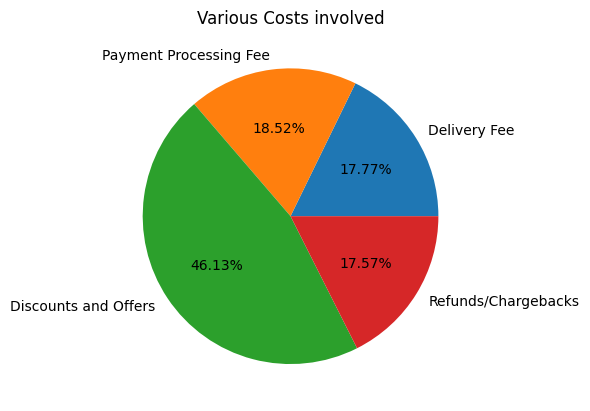

In [19]:

plt.pie(costs, labels=costs.index, autopct='%1.2f%%')
plt.title('Various Costs involved')

plt.show()

In [20]:
df['costs'] = df['Delivery Fee']+df['Payment Processing Fee']+df['Discounts and Offers']+df['Refunds/Chargebacks']


In [21]:
all_costs = df[["costs", "Commission Fee", "Profit"]].sum()
all_costs

,0
costs,161041.85
Commission Fee,126990.00
Profit,-34051.85


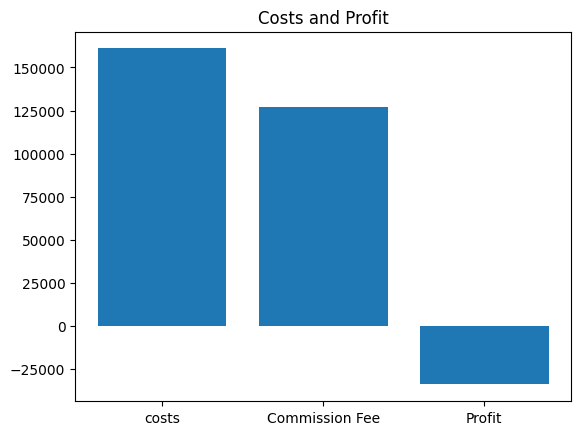

In [23]:
plt.bar(all_costs.index, all_costs.values)
plt.title('Costs and Profit')

plt.show()

We can safely conclude that To be **profitable**:


*   Reduce **Delivery Fee**, **Payment Processing Fee**, **Discounts and Offers** and **Refunds/Chargebacks**.
*   **Commission fee** could be increased if feasible.




